# Importando Librerias

In [1]:
#pip install cellyzer==1.1.2
from IPython.display import IFrame
from IPython.display import HTML
import cellyzer as cz
import pandas as pd

[Errno 17] File exists: 'outputs'


# Leyendo archivos de CDR y Antenas

In [2]:
call_file_path = "demo_datasets/long_data/calls_.csv"
antenna_file_path = "demo_datasets/long_data/antennas.csv"
callDataSet = cz.read_call(call_file_path)
cellDataSet = cz.read_cell(antenna_file_path)
calls_df = pd.read_csv('demo_datasets/long_data/calls_.csv')
calls_df.head(10)

[x]  Reading Call Data
[x]  Dataset object creation successful

[x]  Reading Cell Data
[x]  Dataset object creation successful



,user,other,direction,duration,timestamp,antenna_id,cost
0,7610039694,7.434677e+09,Incoming,211,Wed Sep 15 19:17:44 +0100 2010,2,33
1,7641036117,1.666472e+09,Outgoing,31,Mon Feb 11 07:18:23 +0000 1980,10,12
2,7641036117,7.371326e+09,Incoming,45,Mon Feb 11 07:45:42 +0000 1980,2,1
3,7641036117,7.681546e+09,Outgoing,10,Mon Feb 11 08:04:42 +0000 1980,3,86
4,7641036117,7.681546e+09,Outgoing,0,Mon Feb 11 08:05:31 +0000 1980,4,8
5,7641036117,7.681546e+09,Incoming,0,Mon Feb 11 08:06:18 +0000 1980,5,78
6,7641036117,7.981268e+09,Outgoing,0,Mon Feb 11 08:06:31 +0000 1980,6,83
7,7641036117,7.588304e+09,Incoming,124,Thu Sep 09 19:35:37 +0100 2010,7,2
8,7981267897,7.784426e+09,Outgoing,474,Thu Sep 09 18:43:44 +0100 2010,5,22
9,7981267897,7.743039e+09,Missed,0,Thu Sep 09 19:51:30 +0100 2010,3,30


# Con los CDRs es posible generar una matrix de conexion

In [3]:
callDataSet.print_connection_matrix()
IFrame(src='outputs/connection_matrix.html', width=1000, height=500)

Matrix Length :  707


# La Matrix de Conexión permite encontrar relaciones entre los usuarios


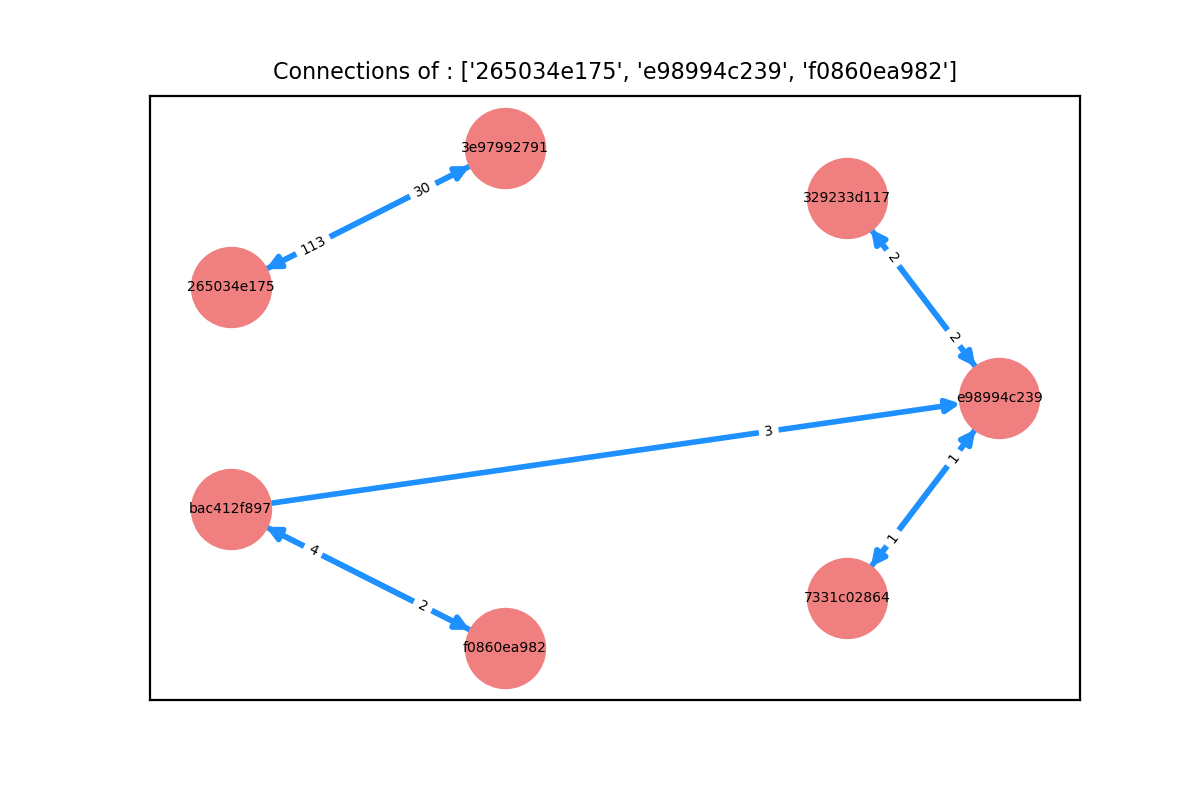

In [4]:
search_user_list = ["265034e175", "e98994c239", "f0860ea982"]
callDataSet.visualize_connection_network(users=search_user_list, gui=True)
HTML(filename="outputs/connection_network.html")

# Los grafos permiten hallar los contactos mas frecuentes

In [5]:
search_user_call_1 = "3e97992791"
search_user_call_2 = "265034e175"
close_contacts = callDataSet.get_close_contacts(search_user_call_1, top_contact=5)
cz.utils.print_close_contacts(close_contacts)

+------------+----------------------------------+
| contact no | no of interactions between users |
+------------+----------------------------------+
| 265034e175 |               107                |
| 5973bd0224 |                42                |
| 77367e5842 |                42                |
| 99ecd73000 |                17                |
| 0c47c9c382 |                16                |
+------------+----------------------------------+


# Y encontrar las ubicaciones aproximadas de hogar y trabajo

In [6]:
user_number = "3e97992791"
user2_number = "265034e175"
user1 = cz.User(callDataSet=callDataSet, cellDataSet=cellDataSet, contact_no=user_number)

location_home = user1.get_home_location()
print('>> home location : ', location_home)
home_cell_id = user1.get_home_location_related_cell_id()
print(">> home location -> cell id : ", home_cell_id)

location_office = user1.get_work_location()
print('>> work location : ', location_office)
officeplace_cell_id = user1.get_work_location_related_cell_id()
print(">> work location -> cell id : ", officeplace_cell_id)

>> home location :  [42.48, -71.23]
>> home location -> cell id :  16
>> work location :  [42.386722, -71.138778]
>> work location -> cell id :  2


In [7]:
cz.visualization.view_home_work_locations(home_location=location_home, work_location=location_office , notebook = True)

# Las cuales cambian según los horarios de trabajo definidos

In [8]:
user3_number = "e98994c239"
user3_1 = cz.User(callDataSet=callDataSet, cellDataSet=cellDataSet, contact_no=user3_number, 
                  work_start_time=17,work_end_time=22)
user3_1_location_home = user3_1.get_home_location()
user3_1_location_office = user3_1.get_work_location()
cz.visualization.view_home_work_locations(home_location=user3_1_location_home, work_location=user3_1_location_office , notebook = True)

In [9]:
user3_2 = cz.User(callDataSet=callDataSet, cellDataSet=cellDataSet, contact_no=user3_number, 
                  work_start_time=5,work_end_time=12)
user3_2_location_home = user3_2.get_home_location()
user3_2_location_office = user3_2.get_work_location()
cz.visualization.view_home_work_locations(home_location=user3_2_location_home, work_location=user3_2_location_office , notebook = True)

# Además, los grafos facilitan encontrar la poblacion cercana a una antena

In [10]:
antennaDataSet = cz.read_cell(antenna_file_path, call_dataset_obj=callDataSet, file_type='csv')
population = antennaDataSet.get_population()
print(">> population around cell")
cz.utils.tabulate_list_of_dictionaries(population)

[x]  Reading Cell Data
[x]  Dataset object creation successful

>> population around cell
+---------+-----------+------------+------------------------+
| cell_id | latitude  | longitude  | population_around_cell |
+---------+-----------+------------+------------------------+
|    1    | 42.366944 | -71.083611 |           0            |
|    2    | 42.386722 | -71.138778 |           3            |
|    3    |  42.3604  | -71.087374 |           0            |
|    4    | 42.353917 |  -71.105   |           0            |
|    5    |   42.36   |   -71.12   |           0            |
|    6    |  42.375   |   -71.1    |           2            |
|    7    |  42.345   |   -71.09   |           1            |
|    8    |   42.39   |  -71.105   |           1            |
|    9    |   42.38   |   -71.09   |           1            |
|   10    | 42.304917 | -71.147374 |           2            |
|   11    | 42.373917 | -70.067374 |           2            |
|   12    | 42.313917 | -71.037374 |      

In [11]:
cz.visualization.cell_population_visualization(population, notebook = True)

# Y visualizar los trayectos generados dentro de la ciudad

In [13]:
call_made_locations = antennaDataSet.get_trip_details("329233d117")
cz.visualization.trip_visualization(call_made_locations)
IFrame(src='outputs/trip_map.html', width=1000, height=500)